<a href="https://colab.research.google.com/github/so-radiohead/main/blob/master/SentenceCoherence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing sentence coherence with LSTM+CNN neural net

This notebook proposes an algorithm to evaluate sentence-level coherence using developed from training corpus embedding matrix and LSTM-CNN deep neural network.

In [1]:
import torch
from torch import nn, optim
import pandas as pd
import numpy as np
import re

Let's choose sentences of lenght 10 (words+punctuation) from English corpus of `Tatoeba` dataset.

In [5]:
sentences = []
train_sen = []
length = []

sent = pd.read_csv('eng_sentences.tsv', sep="\t", header=None)

sentences = []
test_sent = [len(re.findall(r"[\w']+|[.,!?;]", i.lower())) for i in sent[2]]


from collections import Counter
data = Counter(test_sent)
print(data.most_common()) # most common lengths
print(np.mean(test_sent)) # average length

num_words=10

for i in sent[2]:
    splitsent = re.findall(r"[\w']+|[.,!?;]", i.lower()) # split into words and punc
    train_sen.append(splitsent)
    if len(splitsent)>=num_words:
        sentences.append(splitsent[:num_words]) # truncate if len>10

print(sentences[:10]) # first 10 sentences

[(7, 209841), (8, 196645), (6, 183372), (9, 155206), (5, 123152), (10, 116880), (11, 84483), (12, 59794), (4, 50089), (13, 41110), (14, 27176), (15, 17962), (16, 12070), (3, 8254), (17, 8077), (18, 5888), (19, 4479), (20, 3550), (21, 2756), (22, 2349), (23, 1996), (24, 1656), (25, 1473), (26, 1247), (27, 1144), (28, 1024), (29, 959), (30, 864), (31, 720), (32, 653), (33, 624), (2, 563), (34, 556), (36, 498), (35, 471), (37, 428), (38, 377), (39, 361), (40, 318), (41, 275), (42, 267), (43, 254), (44, 227), (46, 221), (47, 216), (45, 211), (51, 169), (48, 166), (49, 149), (50, 139), (52, 120), (53, 116), (54, 108), (56, 95), (55, 93), (58, 89), (57, 88), (59, 75), (60, 72), (61, 70), (64, 62), (62, 59), (68, 52), (63, 48), (70, 46), (65, 45), (69, 42), (66, 40), (67, 34), (75, 30), (71, 29), (74, 29), (77, 26), (72, 25), (76, 25), (79, 24), (73, 22), (84, 22), (83, 20), (81, 19), (80, 18), (88, 14), (86, 13), (78, 12), (85, 11), (90, 11), (82, 10), (98, 9), (104, 9), (94, 9), (89, 8), (9

Generating embedding matrix on train corpus using `gensim` library.

In [7]:
from gensim.models import Word2Vec
from tqdm import tqdm

tqdm.pandas()

embedding_dim = 64

model = Word2Vec(sentences=train_sen, window=2, min_count=1,
                 sg=1, 
                 size=embedding_dim ,  
                 workers=4)

model.save("word2vec.model")

model.wv.most_similar('nice') # most similar words to 'nice' based on cosine similarity


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wonderful', 0.8186337947845459),
 ('lovely', 0.814646303653717),
 ('cool', 0.7956430315971375),
 ('fantastic', 0.7926279902458191),
 ('friendly', 0.7902523279190063),
 ('awesome', 0.779449462890625),
 ('pleasant', 0.7779337763786316),
 ('funny', 0.7679750919342041),
 ('cute', 0.7533117532730103),
 ('amazing', 0.75303715467453)]

In [8]:
import random

print(len(model.wv.vocab.keys())) # number of words in the embed matrix

vocabulary = []

for i in sentences:
  for y in i:
    if y not in vocabulary:
      vocabulary.append(y)

print(vocabulary) # words from sentences of length 10
print('Number of words from 10-length sentences: ', len(vocabulary))

# representing sentences of length 10as embeddings arrays
sent_embed = np.array([[model.wv[y] for y in i] for i in sentences]) 
print('Original', sent_embed.shape) # num of sent * num of words * embedding dim

swapped = sent_embed
sent_embed = sent_embed.copy()

for i in swapped:
  np.random.shuffle(i) # randomly shuffling words in each sentence to create non-coherent sentences

print('Swapped', swapped.shape)

labels_or = [1 for i in range(len(sent_embed))] # labels for coherent sentences
labels_sw = [0 for i in range(len(swapped))] # labels for non-coherent ones


63877
['today', 'is', 'june', '18th', 'and', 'it', "muiriel's", 'birthday', '!', 'i', 'may', 'give', 'up', 'soon', 'just', 'nap', 'instead', '.', "i'll", 'do', 'my', 'best', 'not', 'to', 'disturb', 'your', 'studying', 'can', 'only', 'wonder', 'if', 'this', 'the', 'same', 'for', 'suppose', "it's", 'different', 'when', 'you', 'think', 'about', 'over', 'last', 'person', 'told', 'idea', 'thought', 'world', "weren't", 'in', 'shape', 'now', 'they', 'are', 'too', 'busy', 'fighting', 'against', 'each', 'other', 'care', 'some', 'reason', 'feel', 'more', 'alive', 'at', 'night', "don't", 'want', 'be', 'lame', ';', 'grow', ',', 'a', 'america', 'lovely', 'place', "i'm", 'real', 'fish', 'mere', "i've", 'always', 'wondered', 'what', "it'd", 'like', 'have', 'siblings', 'would', 'take', 'forever', 'me', 'explain', 'everything', 'word', "i'd", 'find', 'substitute', 'antisocial', 'but', "doesn't", 'mean', 'impolite', 'unhappy', "wouldn't", 'kill', 'myself', 'back', 'high', 'school', 'got', '6', 'could', 

In [9]:
# 1st sentence in form of embeddings
print(sent_embed[0])
print(swapped[0])

# 1st sentence in form of text
print(' '.join([model.wv.most_similar([i], topn=1)[0][0] for i in sent_embed[0]]))
print(' '.join([model.wv.most_similar([i], topn=1)[0][0] for i in swapped[0]]))


[[ 5.27907014e-01  9.89725769e-01  4.13303971e-01  7.96474367e-02
  -2.68942982e-01 -2.24381655e-01 -5.16833961e-01  6.73203468e-01
  -3.14917803e-01 -7.57652521e-02  3.58344465e-01 -1.73246652e-01
  -7.10513294e-01 -2.84859277e-02  1.11720562e+00 -5.71471810e-01
  -1.49084926e-01 -2.46295199e-01  8.32143247e-01 -7.57512376e-02
  -1.00735463e-01 -4.52572733e-01  1.07151762e-01 -6.41456127e-01
   1.14700869e-01  1.87548492e-02  6.54713869e-01 -1.16168594e-05
   6.29572392e-01  4.89338547e-01 -2.82270432e-01  6.91102028e-01
  -7.13787898e-02 -1.97079688e-01 -2.42927089e-01 -1.30063668e-01
   2.40769479e-02  3.65366578e-01  3.67505461e-01 -1.99511662e-01
  -5.53959727e-01  9.41397011e-01 -1.49378866e-01 -2.76708424e-01
  -4.38935339e-01  1.54897690e-01  4.37066555e-01 -4.23751682e-01
  -2.92341292e-01  1.50917798e-01 -7.55421758e-01 -1.24919258e-01
   4.48990285e-01  7.60529280e-01 -3.98359805e-01  9.59743500e-01
  -5.58927298e-01  5.69561660e-01 -8.34021211e-01  6.16095126e-01
  -5.36979

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# Model

My neural net consists of a single bidirectional LSTM layer (technicaly, 2 layers) and a single 1-d convolutional layer with kernel size=2 which strides over pairs of words (hidden states of LSTM) with overlap=1, measuring coherence across words pairs. Conv layer is followed by two linear layers, making use of all the activation maps and resulting in 2 values (for non-coherent/coherent classes). LSTM dimension is 50, and number of conv filters is 30.

In [10]:
batch_size = 100

class CohNet(nn.Module):
    def __init__(self,  hidden_size, cnn_size, num_words, embedding_dim):
        super(CohNet, self).__init__()
        self.hidden_size = hidden_size
        self.cnn_size = cnn_size
        self.num_words = num_words
        self.embedding_dim = embedding_dim
        
        self.lstm = nn.LSTM(embedding_dim, hidden_size, batch_first=True, 
                            bidirectional=True)  
        self.cnn = nn.Conv1d(hidden_size*2, cnn_size, kernel_size=2, stride=1)
        self.lin1 = nn.Linear((num_words-1)*cnn_size, 512)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(512, 2)
        self.drop = nn.Dropout(.3)


    def forward(self, x, hidden):

      batch_size = x.size(0)
      out, hidden = self.lstm(x, hidden)
      out = self.drop(out)
      out = out.permute(0,2,1) # batch_size * hidden_dim * num_words
      # sliding over doubled hidden states
      repr = self.cnn(out) # feature maps
      
      x = repr.view(batch_size, -1)
      x = self.relu(self.lin1(x))
      x = self.lin2(x) # class preds

      return x, hidden, repr

    def initHidden(self, batch_size):
        weight = next(self.parameters()).data
        if torch.cuda.is_available():
          hidden = (weight.new(2, batch_size, self.hidden_size).zero_().cuda(),
                  weight.new(2, batch_size, self.hidden_size).zero_().cuda())
        else:
          hidden = (weight.new(2, batch_size, self.hidden_size).zero_().cpu(),
                  weight.new(2, batch_size, self.hidden_size).zero_().cpu())
        return hidden


hidden_size = 50
cnn_size = 30

In [11]:
net = CohNet(hidden_size, cnn_size, num_words, embedding_dim)
if torch.cuda.is_available(): net.cuda()

Splitting data

In [12]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

features = np.concatenate([sent_embed, swapped]) # all sentences

print(len(features))

labels = np.concatenate([labels_or,labels_sw])

print(len(labels)) # all labels

X_train, X_val_, y_train, y_val_ = train_test_split(features, labels, test_size=0.2, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val_, y_val_, test_size = .0013, shuffle=True)

train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_data = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_load = DataLoader(train_data, batch_size=100, shuffle=True, drop_last=True)
valid_load = DataLoader(val_data, batch_size=100, shuffle=True, drop_last=True)
test_load = DataLoader(test_data, batch_size=100, shuffle=True, drop_last=True)

print(len(train_load))
print(len(valid_load))
print(len(test_load))

torch.save(test_load, 'test_data.pth') # saving test loader, because Colab runs out of RAM

812350
812350
6498
1622
2


Training

In [13]:
from sklearn.metrics import accuracy_score

soft = nn.Softmax()
optimizer = optim.Adam(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for e in range(10):
  hidden = net.initHidden(batch_size)
  train_sen = []
  train_res = []
  val_res = []
  train_loss = []
  val_loss = []
  train_lab = []
  val_lab = []
    
  for f,l in train_load:
    
    if torch.cuda.is_available():
      f, l = f.cuda(), l.cuda()
    
    hidden = tuple([e.data for e in hidden])
    net.zero_grad()
    out, hidden, _ = net(f, hidden)

    for i in out:
      train_res.append(int(torch.argmax(soft(i))))

    error = criterion(out, l)
    train_loss.append(error.item())

    for i in l.cpu().detach().numpy():
      train_lab.append(i)

    error.backward()
    optimizer.step()

  
  net.eval()

  valid_hidden_state = net.initHidden(batch_size)

  for f_val, l_val in valid_load:

    if torch.cuda.is_available():
      f_val, l_val = f_val.cuda(), l_val.cuda()
    
    valid_hidden_state = tuple([e.data for e in valid_hidden_state])
    out, valid_hidden_state, _ = net(f_val, valid_hidden_state)

    for i in out:
      val_res.append(int(torch.argmax(soft(i))))

    error = criterion(out, l_val)
    val_loss.append(error.item())

    for i in l_val.cpu().detach().numpy():
      val_lab.append(i)

  net.train()

  print(f'Epoch: {e+1}/10')
  print(f'Train loss: {np.mean(train_loss)}')
  print(f'Valid loss: {np.mean(val_loss)}')
  print(f'Training acc: {accuracy_score(train_lab, train_res)}')
  print(f'Val acc: {accuracy_score(val_lab, val_res)}')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1/10
Train loss: 0.08484832771580306
Valid loss: 0.054223786876163686
Training acc: 0.9674761465066174
Val acc: 0.9809309494451295
Epoch: 2/10
Train loss: 0.05856037640863646
Valid loss: 0.06657156888274969
Training acc: 0.9793613419513697
Val acc: 0.9792786683107275
Epoch: 3/10
Train loss: 0.05611010770355973
Valid loss: 0.04405650749129936
Training acc: 0.9799969221298861
Val acc: 0.9845129469790382
Epoch: 4/10
Train loss: 0.05441969937271037
Valid loss: 0.055391992215651664
Training acc: 0.9805863342566944
Val acc: 0.9771824907521578
Epoch: 5/10
Train loss: 0.05404010997942999
Valid loss: 0.05033398134049382
Training acc: 0.9802800861803632
Val acc: 0.980924784217016
Epoch: 6/10
Train loss: 0.05237264578748188
Valid loss: 0.04514861908903789
Training acc: 0.9813911972914743
Val acc: 0.9844944512946979
Epoch: 7/10
Train loss: 0.05268279442000621
Valid loss: 0.04205537394407457
Training acc: 0.9810649430594028
Val acc: 0.984593094944513
Epoch: 8/10
Train loss: 0.051729599570753

After 10 epochs we got `98.5%` validation accuracy on ~`162k` sentences.

In [14]:
torch.save(net.state_dict(), 'coherence_model.pt')

Changing runtime to cpu, redefining model class, reloading model params, test data, and embeddings.

In [28]:
import torch
from torch import nn, optim
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from tqdm import tqdm

tqdm.pandas()

batch_size = 100

class CohNet(nn.Module):
    def __init__(self,  hidden_size, cnn_size, num_words, embedding_dim):
        super(CohNet, self).__init__()
        self.hidden_size = hidden_size
        self.cnn_size = cnn_size
        self.num_words = num_words
        self.embedding_dim = embedding_dim
        
        self.lstm = nn.LSTM(embedding_dim , hidden_size, batch_first=True, 
                            bidirectional=True)  
        self.cnn = nn.Conv1d(hidden_size*2, cnn_size, kernel_size=2, stride=1)
        self.lin1 = nn.Linear((num_words-1)*cnn_size, 512)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(512, 2)
        self.drop = nn.Dropout(.3)


    def forward(self, x, hidden):

      batch_size = x.size(0)
      out, hidden = self.lstm(x, hidden)
      out = self.drop(out)
      out = out.permute(0,2,1)

      repr = self.cnn(out) # feature maps
      
      x = repr.view(batch_size, -1)
      x = self.relu(self.lin1(x))
      x = self.lin2(x) # class preds

      return x, hidden, repr

    def initHidden(self, batch_size):
        weight = next(self.parameters()).data
        if torch.cuda.is_available():
          hidden = (weight.new(2, batch_size, self.hidden_size).zero_().cuda(),
                  weight.new(2, batch_size, self.hidden_size).zero_().cuda())
        else:
          hidden = (weight.new(2, batch_size, self.hidden_size).zero_().cpu(),
                  weight.new(2, batch_size, self.hidden_size).zero_().cpu())
        return hidden


hidden_size = 50
cnn_size = 30
num_words = 10
embedding_dim = 64

device = torch.device('cpu')
net = CohNet(hidden_size, cnn_size, num_words, embedding_dim)
net.load_state_dict(torch.load('coherence_model.pt', map_location=device))
test_load = torch.load('test_data.pth')
net.eval()

model = Word2Vec.load("word2vec.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Testing on test data

In [43]:
from sklearn.metrics import accuracy_score

soft = nn.Softmax()

batch_size = 100
test_res = []
test_lab = []
sen_test = []
representations = []

hidden = net.initHidden(batch_size)

# turning senences to text
for f_test, l_test in test_load:
  for y in f_test:
    sen_test.append(' '.join([model.wv.most_similar([i], topn=1)[0][0] 
                              for i in y.numpy()]))

  out, hidden, repr = net(f_test, hidden)

  # actual score
  for i in l_test.cpu().detach().numpy():
      test_lab.append(i)
  
  # predicted score
  for i in out:
      test_res.append(soft(i))
  
  # feature maps
  for i in repr.cpu().detach().numpy():
    representations.append(i)

print(f'Test accuracy: '
      f'{accuracy_score(test_lab, [int(torch.argmax(i)) for i in test_res])}')


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy: 0.985


In [47]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#30 filters of 9 word-to-word connections in the 1st sentence
print(representations[1])

print('Predicted: ', int(torch.argmax(test_res[1])))
print('Actual: ', test_lab[1])
print(sen_test[1])

[[ 6.24305296e+00  2.84661412e-01  1.21547925e+00  2.63194466e+00
   2.93727064e+00  2.32732487e+00  2.68336296e+00  3.06883883e+00
   6.17212105e+00]
 [ 4.64728642e+00  2.20966148e+00  1.61387813e+00  4.40773153e+00
   3.03652549e+00  1.68081212e+00 -2.98072904e-01 -2.95022464e+00
   1.25674975e+00]
 [ 7.06953096e+00  2.76872665e-01  1.46406043e+00  4.06183767e+00
   8.41831112e+00  2.39957738e+00  1.97776663e+00 -1.17706180e+00
   6.41080570e+00]
 [-7.20580149e+00 -7.22541857e+00 -2.70859838e+00 -2.81773758e+00
  -7.21481383e-01 -4.15710926e+00  5.97884357e-01 -2.98662663e+00
  -2.36661553e+00]
 [ 3.31186295e+00  1.68977976e+00  2.24309850e+00  2.72255659e+00
   4.10905504e+00  4.81560373e+00 -1.70214045e+00  2.18469739e+00
   6.33026302e-01]
 [ 6.49139738e+00 -9.55441475e+00 -4.49071550e+00 -2.05217743e+00
  -1.41615868e+01 -2.67378750e+01 -3.50011215e+01 -1.86008797e+01
   7.01650906e+00]
 [-1.14427967e+01 -2.50381279e+00 -5.62868071e+00 -1.38824892e+01
  -2.17211208e+01 -2.3669515

Heatmap test results

Sentence: isn't , find to tom is job trying he a
Predicted: non-coherent
Predicted coherence level: 0.0%
Actual: non-coherent



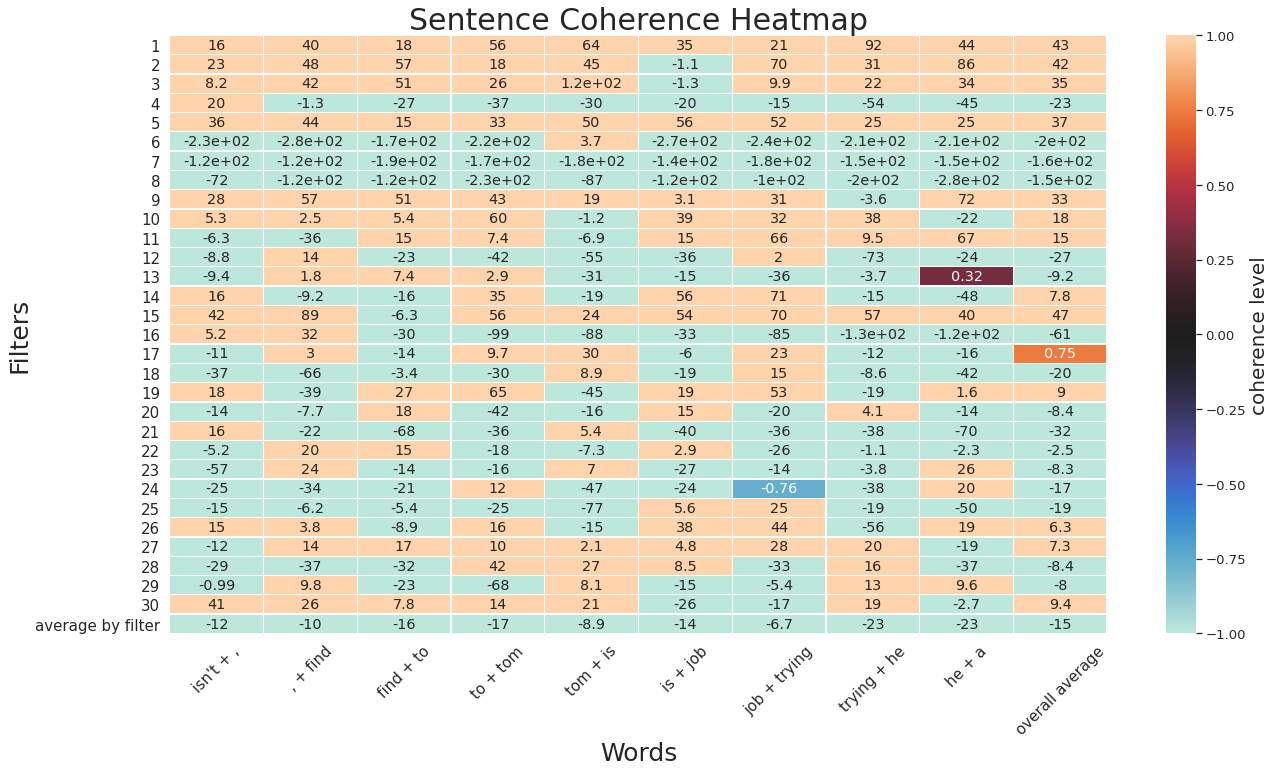

In [81]:
import re

def res(numb):
  if numb == 1:
    return 'coherent'
  else: return 'non-coherent'
  
def show_representations(indx):
  print('Sentence:', sen_test[indx])
  print('Predicted: '+ res(int(torch.argmax(test_res[indx]))))
  print(f'Predicted coherence level: '
      f'{np.round(np.float(test_res[indx][1]*100), decimals=3)}%')
  print('Actual: '+res(test_lab[indx])+'\n')
  
  # average conv value for whole sentence for each filter
  hidden_mean = np.expand_dims(np.mean(representations[indx], axis=1),1)
  

  aver_maps = np.mean(hidden_mean)
  aver_maps = np.expand_dims(np.array([aver_maps for i in range(30)]),1)

  reps = []
  for i in zip(representations[indx], hidden_mean):
      reps.append(np.concatenate([i[0], i[1]]))

  reps = np.array(reps)
  # average conv value for each word pair by filter 
  # + final average of the sentences averages
  mn = [np.mean(reps, axis=0)]
  reps = np.append(reps, mn, axis=0)

  # derive words pairs for x label
  sentence = re.findall(r"[\w']+|[.,!?;]", sen_test[indx])
  words = [str(sentence[i:i+2][0])+' + '+str(sentence[i:i+2][-1]) 
           for i in range(0, len(sentence), 1)][:-1]

  fig, ax = plt.subplots(figsize=(21,11))
  x_axis = words+['overall average']
  y_axis = [i for i in range(1, 31)]+['average by filter']
  sns.set(font_scale=1.2)

  # multiply by 10 here for scaling
  plot = sns.heatmap(reps*10, vmin=-1, vmax=1, center=0, xticklabels=x_axis, 
                     yticklabels=y_axis, annot=True, linewidths=.3, 
                     cbar_kws={'label': 'coherence level'})
  plot.axes.set_title("Sentence Coherence Heatmap",fontsize=30)
  plot.set_ylabel("Filters",fontsize=25)
  plot.set_xlabel("Words",fontsize=25)
  plot.tick_params(labelsize=15)
  plot.figure.axes[-1].yaxis.label.set_size(20)
  plt.yticks(rotation=0) 
  plt.xticks(rotation=45)


show_representations(62)


Convolutional layer extracts features from samples by applying filters with learned weights (patterns) that match those features. So higher values of the feature maps should point to feature match. In this particular case, higher values convolutions mean higher level of word pair coherence. Final value (average across sentences and feature maps, `overall average`) represents overall level of sentence coherence as seen by convolutional layer. It's easy to notice that those sentences that were classified as coherent have positive overall average value, while those classified as non-coherent end up with negative value.

We can further investigate this heatmap and discover filters most responsible for correct classification, as well as words pairs that classifier has considered as the most coherent/non-coherent.

Naturally, coherent sentences are presented in more warm colors (pos values), while non-coherent sentences tend to cold ones (neg values).

In [86]:
non_coh = []
coh = []

def aver_coherence():
  for i in representations:
    hidden_mean = np.mean(i, axis=1)*10
    aver_maps = np.mean(hidden_mean)
    indx = np.where(representations==i)[0][0]
    if test_lab[indx] == 0: 
      non_coh.append(aver_maps)
      if aver_maps>0: # if final value is positive for incoherent sent
        print(f'Sentence index {indx}: positive conv value for non-coherent sentence')
        print(sen_test[indx])
        print(f'Predicted coherence level: '
            f'{np.round(np.float(test_res[indx][1]*100), decimals=3)}%')
        print('Actual: '+res(test_lab[indx])+'\n')
        
    else:
      coh.append(aver_maps)
      if aver_maps<0: # if final value is negative for coherent sent
        print(f'Sentence index {indx}: negative conv calue for coherent sentenc')
        print(sen_test[indx])
        print(f'Predicted coherence level: '
            f'{np.round(np.float(test_res[indx][1]*100), decimals=3)}%')
        print('Actual: '+res(test_lab[indx])+'\n')

aver_coherence()

print('Conv values for non-coherent sentences: ', non_coh)
print('Conv values for coherent sentences: ', coh,'\n')
print('Number of non-coherent sentences: ', len(non_coh))
print('Number of coherent sentences: ', len(coh))
print('Average conv value for non-coherent sentences: ', np.mean(non_coh))
print('Average conv value for coherent sentences: ', np.mean(coh))

Sentence index 52: positive conv value for non-coherent sentence
politics , friends are in partners there . no only
Predicted coherence level: 56.483%
Actual: non-coherent

Sentence index 97: positive conv value for non-coherent sentence
was why to tell you afraid i is this .
Predicted coherence level: 0.069%
Actual: non-coherent

Sentence index 116: negative conv calue for coherent sentenc
of all the books published recently , only a few
Predicted coherence level: 3.489%
Actual: coherent

Sentence index 128: positive conv value for non-coherent sentence
been since i saw ten . it's her last years
Predicted coherence level: 84.298%
Actual: non-coherent

Conv values for non-coherent sentences:  [-13.846162, -1.2520486, -9.563661, -9.870724, -1.3474971, -16.234434, -10.091138, -13.275513, -17.516857, -8.957961, -11.241328, -16.819527, -9.435672, -6.871011, -7.223556, -2.4344609, -8.063745, -1.7503115, -8.245326, -7.0320764, -7.0759444, -4.963281, -10.0656, 3.453771, -13.23475, -10.31164, 

We can see that the average conv value of coherent sentences is `5.8` and corresponding value of non-coherent ones is `-9`. However, there are exceptions - negative values for coherent sentences and positive for non-coherent (sentence at index `97` was classified correctly nevertheless). Let's exlore those exceptions.

Sentence: politics , friends are in partners there . no only
Predicted: coherent
Predicted coherence level: 56.483%
Actual: non-coherent



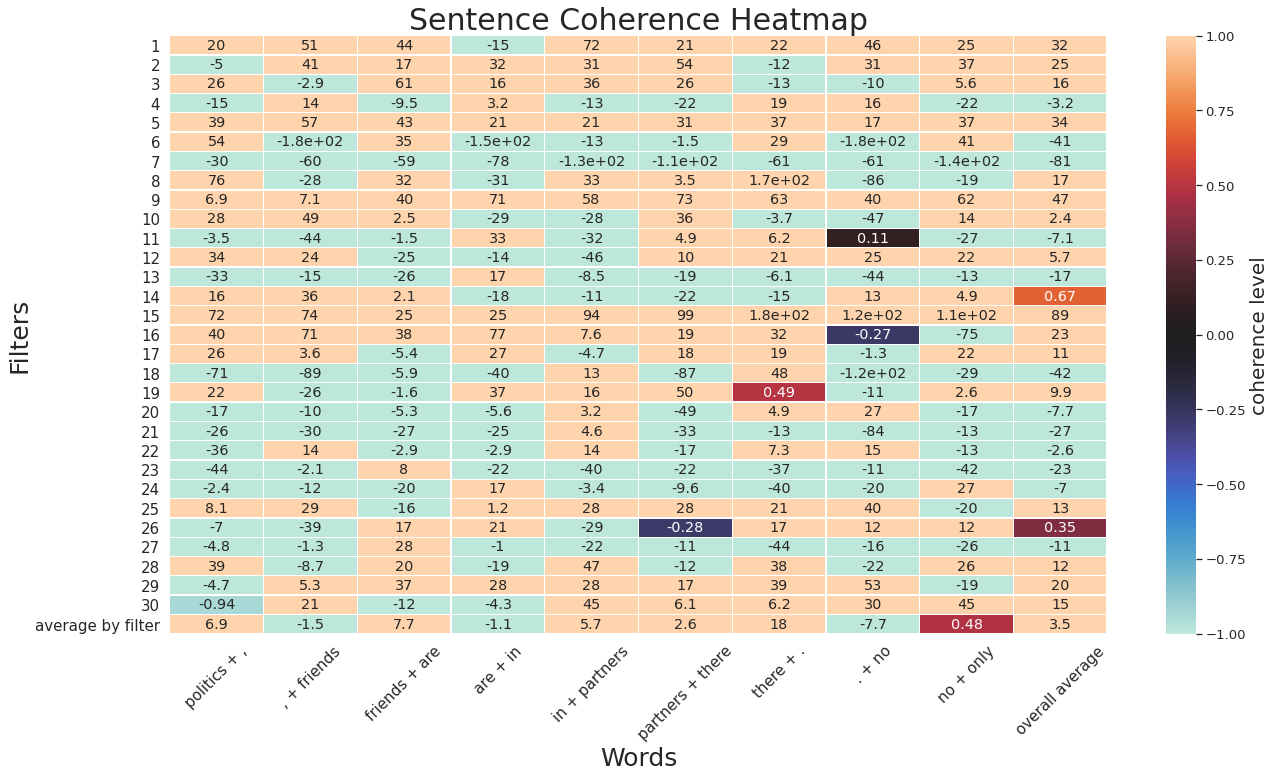

In [83]:
show_representations(52)

Overall this sentence could be interpreted as coherent except for the last part,which doesn't mean much since a lot of sentences were truncated and hence aren't presented as fully coherent per se. Notice that classifier correctly debunks non-coherence within `. + no` word pair (value of `-7.7`), as it is unusual to have a period before next word. 

Sentence: of all the books published recently , only a few
Predicted: non-coherent
Predicted coherence level: 3.489%
Actual: coherent



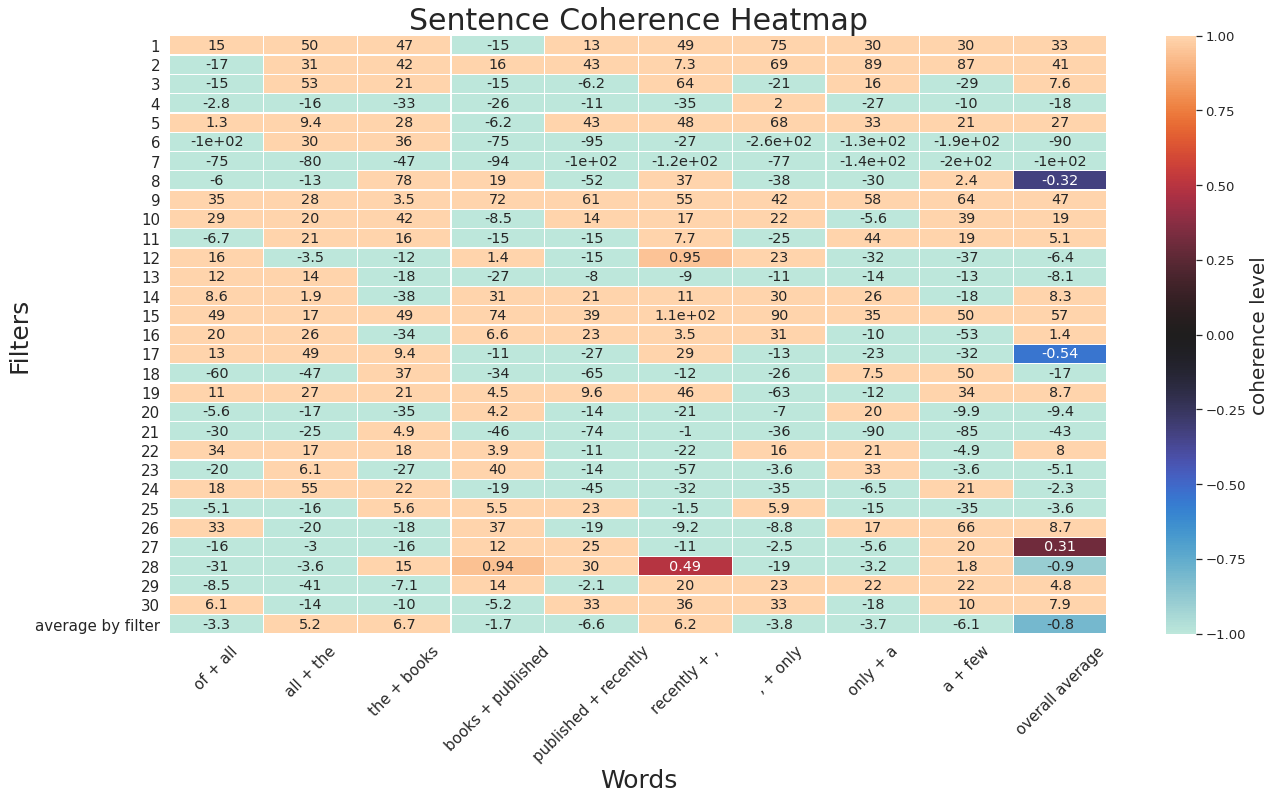

In [84]:
show_representations(116)

This one is obviously a classification fail, although final negative value is pretty close to zero, and some filters (`15,9,1,2,5`) did a good job classifying the sentence as coherent.

Sentence: been since i saw ten . it's her last years
Predicted: coherent
Predicted coherence level: 84.298%
Actual: non-coherent



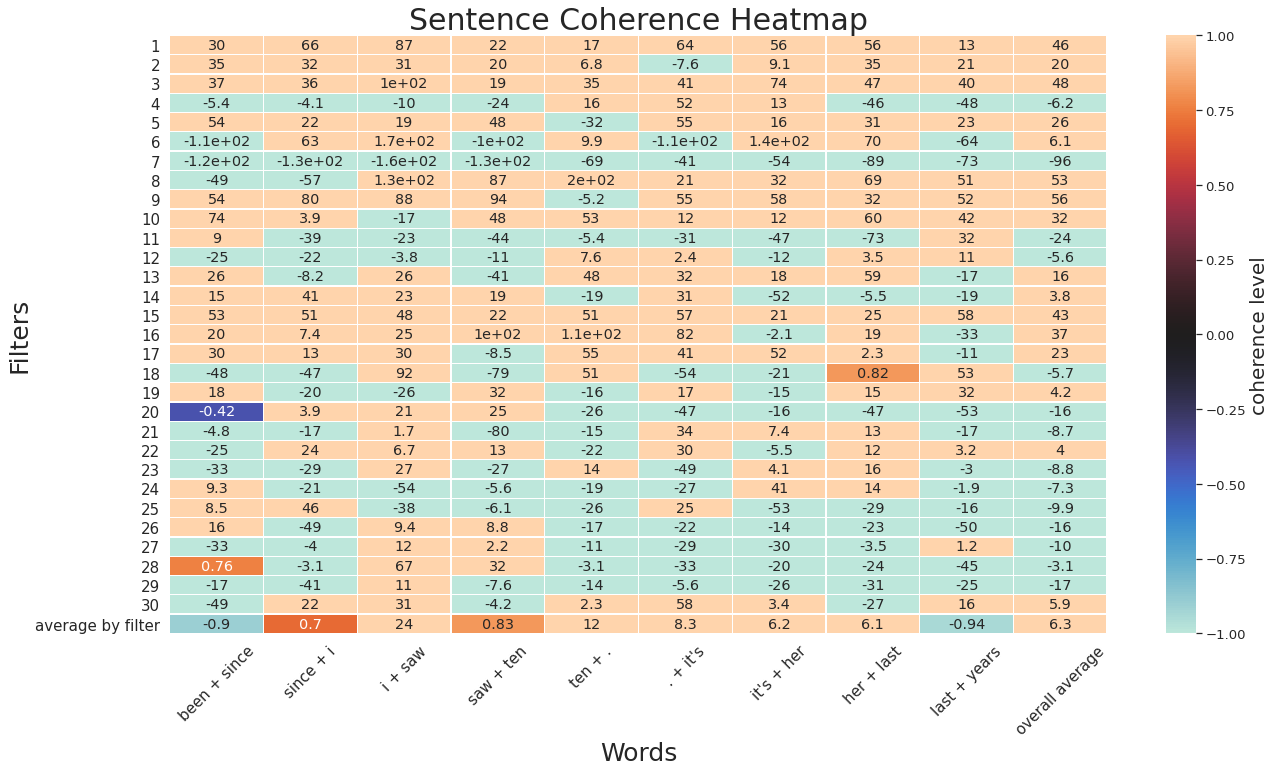

In [85]:
show_representations(128)

Again, except an obvious miss at `. + it's` pair, most of words pairs are perfectly coherent, so it's understandable that model got confused.

# Final notes

Obviously, both model and training hyperparameters are arbitrary and might be changed for better performance, as well as model architecture in general - e.g. including learnable embedding layer (or using pre-trained word2vec/glove embeddings). But it seems like more essential is dataset size that simply didn't let the model learn which words pairs should be considered as coherent. So bigger and more diverse corpus should prevent mistakes like those above from happpening.

It's worth saying that the model shows better performance on longer sentences (initial length choice was `5` with loss rising about `4` times and ~`5%` drop in accuracy) and it would be interesting to investigate its behaviour on zero padded sentences.

As for use cases, described model can be modified to evaluate multiple-sentences text coherence (with only one hidden state derived from each sentence).